### ▶[Part1]. 데이터 준비
- 폴더별로 이미지를 준비함. 폴더명의 a,b,d.... 오름차순에 의하여 0,1,2,3의 레이블값이 제작됨

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# 데이터가 있는 폴더
data_dir='C:/Users/user/.keras/datasets/flower_photos'

In [3]:
# 필수사항은 아님. 폴더안의 자료 확인차임.
from glob import glob
folderList=glob(data_dir + '/*')
total = 0
for folder  in folderList:
    print(folder)
    fileList=glob(folder + '/*' )
    print(len(fileList))
    total += len(fileList)
print(total)

C:/Users/user/.keras/datasets/flower_photos\daisy
633
C:/Users/user/.keras/datasets/flower_photos\dandelion
898
C:/Users/user/.keras/datasets/flower_photos\LICENSE.txt
0
C:/Users/user/.keras/datasets/flower_photos\roses
641
C:/Users/user/.keras/datasets/flower_photos\sunflowers
699
C:/Users/user/.keras/datasets/flower_photos\tulips
799
3670


### ▶[Part2.] Keras 유틸리티를 사용하여 데이터 로드하기
- 학습자료가 npy,npz라면 아래 작업을 하지 않아도 된다 (model.fit 고고)
- 사용자가 설정한 배치크기만큼 x,y 데이터셋을 제작하는 과정
     - 이미지크기를 지정한 사이즈로 통일하고
     - x데이터를 세트로 array 시키고
     - y값은 폴더이름에 따라서 순차적으로 0,1,2,3....4를 부여함
     - 폴더이름을 class_names에 할당
- x,y값을 사용자가 지정한 비율에 맟추어서 train, test로 분리

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  subset="training",   #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  subset="validation",    #data_dir폴더를 훈련과 테스트로 나눌때만 필요한 코드
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
# 폴더명을 가져옴
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
################# 참고 [필수 아님]
# 633+898+641+699+799  총 3670개 자료
# validation_split=0.2  ==> 총 3670개중 80%는 train, 20%는 test
# train이 2936개이며, 이걸 배치사이즈로 32개씩 묶으면 91.75 ===> 92 개 묶음이 생김

len(list(train_ds))

92

In [8]:
################# 참고 [필수 아님]
list(train_ds)[0]     # 32개의 이미지와 레이블이 있는 92개중 1번 묶음(이미지, 레이블)
list(train_ds)[0][1]  # 레이블

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 2, 3, 3, 1, 2, 4, 4, 4, 4, 1, 4, 3, 1, 2, 1, 0, 3, 3, 0, 4, 3,
       3, 1, 4, 1, 4, 4, 1, 1, 1, 1])>

In [9]:
# numpy.take 함수는 인덱스를 이용해서 어레이의 요소를 가져옵니다.
'''
import numpy as np

a = [4, 3, 5, 7, 6, 8]
indices = [[0, 1], [4, -1]]

print(np.take(a, indices))

[[4 3]
 [6 8]]
'''
list(train_ds.take(2))

[(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
  array([[[[5.10956764e-01, 2.19382715e+00, 5.82715988e-01],
           [0.00000000e+00, 3.31666684e+00, 1.66620362e+00],
           [1.57932138e+00, 4.98333311e+00, 2.59243822e+00],
           ...,
           [8.99089241e+00, 3.19908924e+01, 4.10203743e+00],
           [8.00276756e+00, 3.01694241e+01, 6.66945457e+00],
           [6.36157227e+00, 2.80611076e+01, 5.16126251e+00]],
  
          [[3.82407337e-01, 8.79953575e+00, 1.13129616e+01],
           [4.26111031e+00, 1.53805542e+01, 2.09013863e+01],
           [6.82870245e+00, 1.87953682e+01, 2.47120342e+01],
           ...,
           [8.45276070e+00, 3.14527607e+01, 4.49259281e+00],
           [7.49444437e+00, 2.84319191e+01, 5.34167671e+00],
           [5.81250191e+00, 2.54055519e+01, 3.20786881e+00]],
  
          [[5.96759224e+00, 2.12052460e+01, 3.55401230e+01],
           [2.17777786e+01, 3.65972214e+01, 5.57638855e+01],
           [3.49668236e+01, 4.97862701e+01, 7

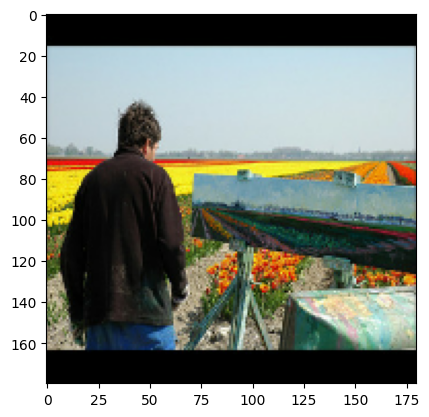

In [10]:
################# 참고 [필수 아님]
list(train_ds)[0][0] # 총 32개의 이미지
img=list(train_ds)[0][0][1].numpy().astype("uint8")
plt.imshow(img)


### ▶[Part3.] 모델 제작


In [11]:
# 성능을 높이도록 데이터세트 구성하기
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
## 증강 아래 내용외에 더 추가해도 됨  (아래의 사이트를 참조해서 다른 증강도 더 넣어도 되고, 또는 처음부터 이미지를 증강해서 준비해도 됨)
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [13]:
### 모델 제작

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),      #모델안에 스케일링 넣어주면 새로운 데이터 넣어서 추론할때 스케일링을 하지 않아도 됨
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(), # 22 * 22 * 64개의 웨이트
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='relu')
])

In [14]:
model = Sequential([
layers.Conv2D(64, 3, padding='same', activation='relu',input_shape=(8,8,3)), # [1]
layers.MaxPooling2D(), # [2]
layers.Conv2D(32, 3, activation='relu'), # [3]
layers.Dropout(0.2), # [4]
layers.Flatten(), # [5]
layers.Dense(64, activation='relu'), # [6]
layers.Dropout(0.2), # [7]
layers.Dense(64, activation='relu'), # [8]
layers.Dense(3, activation='softmax') # [9]
])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          18464     
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                      

In [16]:
model.summary()

# 파라미터 계산법
# layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))
# layers.Conv2D(16, 3, padding='same', activation='relu'),              ==> 3개의 input 채널임, 1개의 채널에는 3개의 커널사이즈가 있음. 즉 9개의 w값이 생성됨
#                                                                           1개채널당 9 * 3개채널 => 27개 + 바이어스1개 =>28개 --->  이런경우가 16개 있음 ===> 총 파람은 [28*16=448개]
# layers.Conv2D(32, 3, padding='same', activation='relu'),              ==> 16개의 input 채널임, 1개의 채널당 9(커널사이즈가 가로3*세로3) 개의 w+1개 바이어스(10개) 
#                                                                           1개채널당 9* 16개채널 => 144개 + 바이어스1개 ==> 145개 --> 이런경우가 32개 있음 ==> 총 파람은 [145*32=4640]
# layers.Conv2D(64, 3, padding='same', activation='relu'),              ==> 32개의 input 채널임, 1개의 채널당 9 * 32개채널 + 바이어스 1 =>289개  * 64개 경우 ==> 총 파람은 [289*64=18496]
# layers.Flatten()                                                      ==> 이미지사이즈 (22,22,64)를 모두 곱함.  30796
# layers.Dense(128, activation='relu'),                                 ==> 30976의 w + 1 개 b ===> 3977 * 128 = 3965056 파람
# layers.Dense(num_classes, activation='relu')                          ==> 128 의 w + 1개 b ==> 129*5=> 646개 파람

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          18464     
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                      

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/iris/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose기본값이 0임, 1을 지정하지 않으면 결과가 화면에 출력되지 않음



epochs=10
history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=[checkpointer]
)



Epoch 1/10


ValueError: in user code:

    File "c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 8, 8, 3), found shape=(None, 180, 180, 3)


In [ ]:
import pandas as pd
hist_df=pd.DataFrame(history.history)
hist_df.head()


,loss,accuracy,val_loss,val_accuracy
0,1.759198,0.390668,1.609438,0.284741
1,1.609437,0.298365,1.609438,0.287466
2,1.609437,0.297343,1.609438,0.287466
3,1.609437,0.293937,1.609438,0.287466
4,1.609437,0.293937,1.609438,0.287466


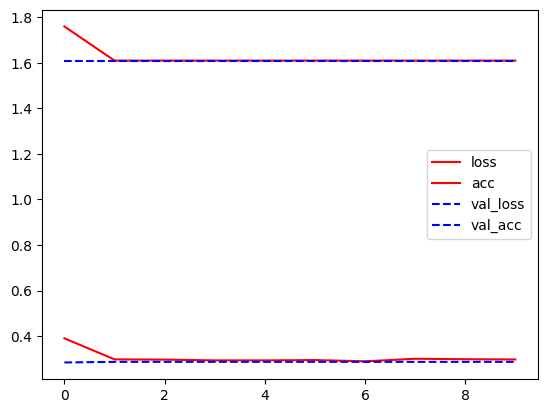

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
plt.plot(hist_df['loss'],'r',label='loss')
plt.plot(hist_df['accuracy'],'r',label='acc')
plt.plot(hist_df['val_loss'],'--b',label='val_loss')
plt.plot(hist_df['val_accuracy'],'--b',label='val_acc')
plt.legend()


###  ▶[Part4.] 오차행렬표 검증표 제작

- 이 자료는 val_ds에서 배치단위로 데이터를 가져오기 때문에...

In [ ]:
X_test,y_test=[],[]
for x, y in val_ds:
    if len(y)==batch_size:
        X_test.append(x.numpy())
        y_test.append(y.numpy())

X_test=np.reshape(X_test, (-1,180,180,3))
y_test=np.reshape(y_test,(-1))


In [ ]:
test_yhat=model.predict(X_test)
# 소프트맥스일때 y값이 원핫인코딩 되어 있다면 아래의 과정1,2가 필요함()
predict_y=np.argmax(test_yhat, axis=1) # [과정1]
real_y=y_test.copy()  # 원핫인코딩 되어 있지 않음으로    

22/22 [==============================] - 1s 33ms/step


In [ ]:
# 오차행렬표임 (교재 388쪽의 하단내용)
import pandas as pd
from sklearn.metrics import confusion_matrix
conMatrix=confusion_matrix(real_y, predict_y)
conMatrix

array([[  0,  41,  20,  65,   0],
       [  0,  39,  32,  96,   2],
       [  0,  33,  13,  70,   0],
       [  0,  36,   1, 107,   0],
       [  0,  50,   5,  94,   0]], dtype=int64)

In [ ]:
## 오차행렬 그래프를 그림으로 필수는 아님
pd.DataFrame(conMatrix)



,0,1,2,3,4
0,0,41,20,65,0
1,0,39,32,96,2
2,0,33,13,70,0
3,0,36,1,107,0
4,0,50,5,94,0


In [ ]:

## 오차행렬 그래프를 그림으로 필수는 아님
# 오차행렬표를 데이터프레임으로 변환 (교재 388쪽 가장하단)
# 오차행렬표를 데이터프레임으로 작업하지 않고, 차트로 보여주는 모듈도 있음.
cnt=len(conMatrix)
pd.DataFrame(conMatrix, 
             index=['true_%d' % i for i in range(cnt)],
             columns=['pred_%d' % i for i in range(cnt)] )

,pred_0,pred_1,pred_2,pred_3,pred_4
true_0,0,41,20,65,0
true_1,0,39,32,96,2
true_2,0,33,13,70,0
true_3,0,36,1,107,0
true_4,0,50,5,94,0


Text(33.22222222222222, 0.5, 'true label')

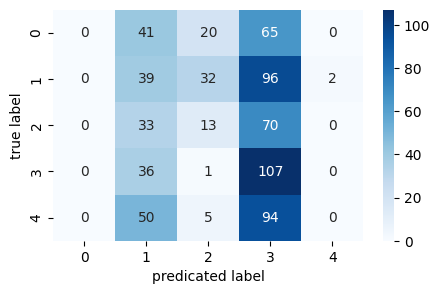

In [ ]:
# 오차행렬표를 차트로 보여주는 작업_혼돈행렬
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(real_y, predict_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.20      0.23      0.21       169
           2       0.18      0.11      0.14       116
           3       0.25      0.74      0.37       144
           4       0.00      0.00      0.00       149

    accuracy                           0.23       704
   macro avg       0.13      0.22      0.14       704
weighted avg       0.13      0.23      0.15       704



c:\Users\user\miniconda3\envs\cpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\miniconda3\envs\cpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\miniconda3\envs\cpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  ▶[Part5.]새로운 데이터로 추론

In [60]:
from PIL import Image
import numpy as np
img=Image.open('c:/data/a.jpg').resize((180,180)).convert('RGB')
img=np.array(img)

img=np.reshape(img, (1,180,180,3))
result=model.predict(img)
resultBun=np.argmax(result)
class_names[resultBun]

1/1 [==============================] - 0s 21ms/step


'dandelion'

 ▶[Part6.] 모델 저장

In [61]:
model.save('c:/data/flower.h5')

In [ ]:
yhat = []
for x,y in val_ds.take(len(list(val_ds))):
    for img in x:
        print('-'* 100)
        img = np.array(img)
        img = np.reshape((img,(1,180,180,3)))
        yhat.append(np.argmax(model.prex.difference(img)))
        
# 덴스 층 과적합, 증강은 어떻게 할건가, 여러 모델 비교